# Implementacja

### Importowanie bibliotek i własnego generatora

In [1]:

# from custom_random import rand
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import uniform

from generator import Generator

### Zmienne Stałe, Globalne

#### Parametry sygnału i zakres

In [2]:

CZAS_TRWANIA = 1  # sekundy
CZESTOTLIWOSC_PROBKOWANIA = 1000  # Hz

ZAKRES = (5, 10) # Liczby rzeczywiste

#### Obliczanie czasu trawania i generowanie szumu białego

In [3]:

LICZBA_PROBEK = CZAS_TRWANIA * CZESTOTLIWOSC_PROBKOWANIA

#Stwórz obiket Generator
gen = Generator()
szum_bialy = gen.uniform(ZAKRES[0], ZAKRES[1], LICZBA_PROBEK)

# Gotowy generator
# szum_bialy = np.random.uniform(-1, 1, LICZBA_PROBEK)

### Wykresy

#### Wykres czasowy szumu białego o rozkładzie równomiernym

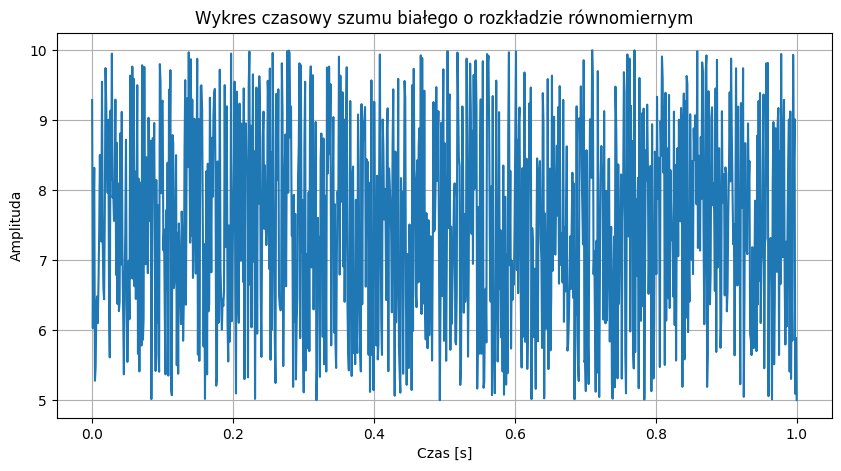

In [4]:

czas = np.linspace(0, CZAS_TRWANIA, LICZBA_PROBEK)
plt.figure(figsize=(10, 5))
plt.plot(czas, szum_bialy)
plt.title('Wykres czasowy szumu białego o rozkładzie równomiernym')
plt.xlabel('Czas [s]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()


#### Wykres częstotliwościowy szumu białego o rozkładzie równomiernym

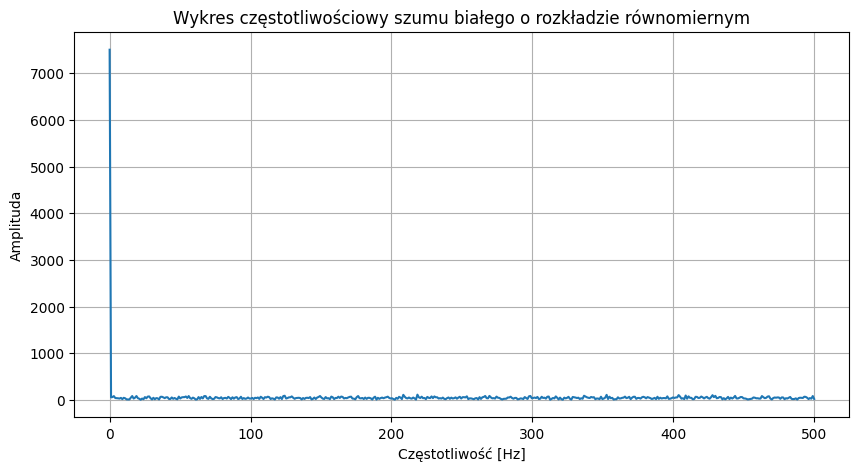

In [5]:

# Wykres częstotliwościowy
spektrum = np.abs(np.fft.fft(szum_bialy))[:LICZBA_PROBEK//2]
czestotliwosc = np.linspace(0, CZESTOTLIWOSC_PROBKOWANIA/2, len(spektrum))
plt.figure(figsize=(10, 5))
plt.plot(czestotliwosc, spektrum)
plt.title('Wykres częstotliwościowy szumu białego o rozkładzie równomiernym')
plt.xlabel('Częstotliwość [Hz]')
plt.ylabel('Amplituda')
plt.grid(True)
plt.show()

### Histogram

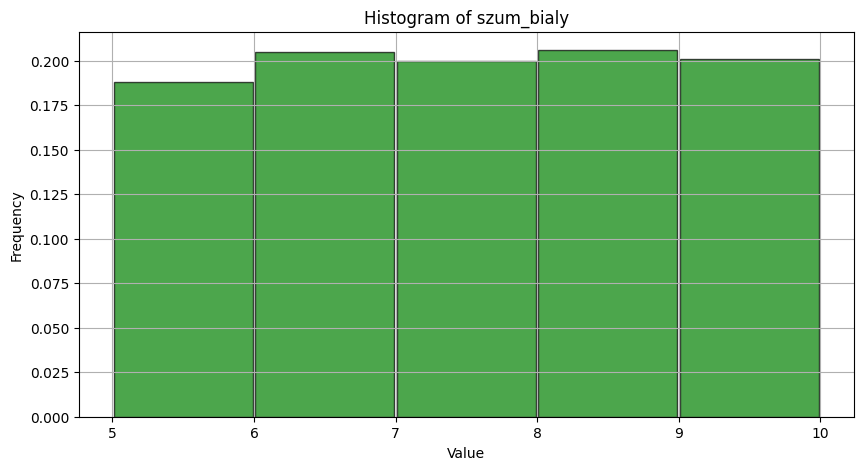

In [13]:
plt.figure(figsize=(10, 5))
plt.hist(szum_bialy, bins=5, density=True, rwidth=0.98, color='g', edgecolor='black', alpha=0.7)
plt.title('Histogram of szum_bialy')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


### Gęstość prawdopodobieństwa

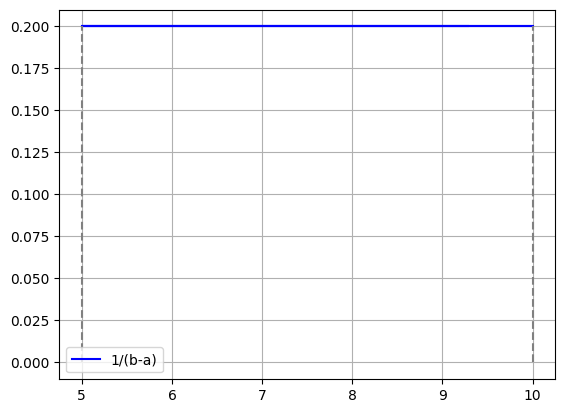

In [7]:
x = np.linspace(ZAKRES[0], ZAKRES[1], 100)
plt.plot(szum_bialy, uniform.pdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1]-ZAKRES[0]), 'b', label='1/(b-a)')
# Dodanie linii przerywanych na początku i końcu
plt.vlines(ZAKRES[0], 0, uniform.pdf(ZAKRES[0], loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0]), colors='gray', linestyles='dashed')
plt.vlines(ZAKRES[1], 0, uniform.pdf(ZAKRES[1], loc=ZAKRES[0], scale=ZAKRES[1] - ZAKRES[0]), colors='gray', linestyles='dashed')

plt.legend()
plt.grid(True)
plt.show()

### Obliczanie dystrybuanty


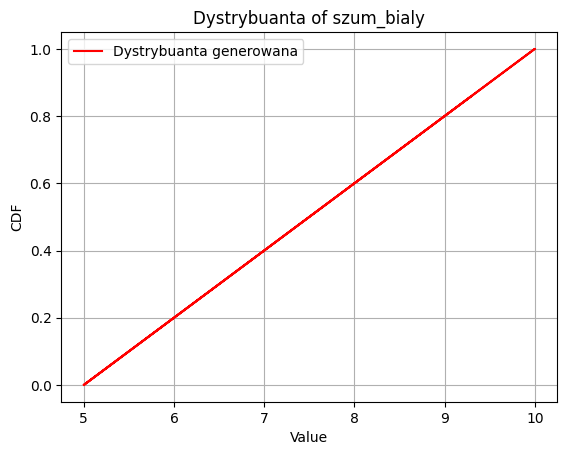

In [8]:
### Obliczanie dystrybuanty
plt.plot(szum_bialy, uniform.cdf(szum_bialy, loc=ZAKRES[0], scale=ZAKRES[1]-ZAKRES[0]), 'r', label='Dystrybuanta generowana')

plt.title('Dystrybuanta of szum_bialy')
plt.xlabel('Value')
plt.ylabel('CDF')
plt.legend()
plt.grid(True)
plt.show()